## WORD CLOUD

In [108]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [7]:
# INFORMATIVE DATA:
#  idea: regular word clouds do not have MEANINGFUL AXES!!
#  (word, jobPopularity, resumePopularity).
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

In [10]:
def text_size(total): # total of jobPopularity and resumePopularity.
    # 8 if total is 0, 28 if total is 200, for instance.
    return 8 + total/200. * 20 # NB: 'float' type is important.

([], <a list of 0 Text yticklabel objects>)

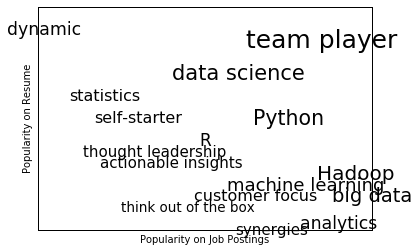

In [11]:
for word,jobPopularity,resumePopularity in data:
    plt.text(jobPopularity, resumePopularity, word, 
             ha='center', va='center',
             size=text_size(jobPopularity+resumePopularity))
        # add text to plot: .text(x, y, string, ...).
plt.xlabel('Popularity on Job Postings')
plt.ylabel('Popularity on Resume')
plt.axis([0,100,0,100])
plt.xticks([])
plt.yticks([])

## LANGUAGE MODELING I: N-GRAM

In [65]:
# IDEA
#  language modeling: say we'd like to generate a number of human-language-like
#   texts, automatically, how do we do it?
# PROCEDURE
#  1. get a list of words somewhere, as base vocabulary.
#  2. build n-gram models.
#  3. generate sentences using n-gram models (stopping: ".").

In [54]:
from bs4 import BeautifulSoup
import requests, html5lib, re, random
from dateutil.parser import parse
from collections import defaultdict

In [25]:
def fix_unicode(text): return text.replace(u"\u2019", "'") # fixing apostrophes.

In [34]:
%%time
url = "https://www.oreilly.com/ideas/what-is-data-science"
html = requests.get(url).text # retrieve text in html format.
soup = BeautifulSoup(html, 'lxml')

CPU times: user 41.7 ms, sys: 2.59 ms, total: 44.3 ms
Wall time: 1.25 s


In [47]:
# PROCESSING SOME SUBSET TEXT
content = soup.find("div", "article-body") # find article-body div.
regex = r"[\w']+|[\.]" # matches a word or a period.
# get a list of words.
document = []
for paragraph in content("p"): # for each paragraph.
    words = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(words)

In [53]:
# BUILD 2-GRAM MODEL USING ZIP
#  zip stops when any of its inputs is done.
bigrams = zip(document, document[1:])
transitions = defaultdict(list) # { prevWord:[succ1, succ2, ...], ... }.
for prev,current in bigrams:
    transitions[prev].append(current)

In [59]:
# SENTENCE GENERATION USING BIGRAM
def generate_using_bigrams():
    current = "." # start with a word following period.
    result = []
    while True:
        nextWordCandidates = transitions[current] # get all possible succeeding words.
        current = random.choice(nextWordCandidates) # choose one randomly.
        result.append(current)
        if current==".": return " ".join(result) # return sentence when hitting period.
for i in range(3):
    print 'Sentence ' + str(i+1) + ': ' + generate_using_bigrams()
    print

Sentence 1: According to define a horde of Hal Varian's quote that data feeds web and Amazon's Dynamo and frequent shopper's cards make it all equipment fails you understand what you aren't drowning in which you will find out how economies work R analyzes mortgage foreclosures in enabling agile flexible schema .

Sentence 2: Most of travellers or so does that data was probably generated 2 Information platforms have had built around data are you looking at LinkedIn dpatil the next sexy job postings with reality of data was never an important until after all heard a horde of operations fails or more and find out how to be mined .

Sentence 3: Does a state where actuaries in any data and particularly physicists rather than another piece of data is trying to develop training data that were the web is frequently missing do with an excellent graphics facilities CRAN includes parsers and using Yahoo to get .



In [64]:
# 3-GRAM VERSION OF THE SAME THING
trigrams = zip(document, document[1:], document[2:])
trigramTransitions = defaultdict(list)
starts = []
for prev,current,next in trigrams:
    if prev==".": starts.append(current) # collecting 'start-words' (prev='.' won't work here!).
    trigramTransitions[(prev,current)].append(next)
def generate_using_trigrams():
    current = random.choice(starts) # choose 1 start-word from collection.
    prev = "."
    result = [current]
    while True:
        nextWordCandidates = trigramTransitions[(prev,current)]
        nextWord = random.choice(nextWordCandidates)
        prev,current = current,nextWord
        result.append(current)
        if current==".": return " ".join(result)
for i in range(3):
    print 'Sentence ' + str(i+1) + ': ' + generate_using_trigrams()
    print

Sentence 1: They were the vanguard but newer companies like bit .

Sentence 2: In the map stage a programming task is divided into a tractable form making it tell its story .

Sentence 3: We don't yet know what those products are but we do know that the winners will be built around data .



## LANGUAGE MODELING II: GRAMMAR

In [ ]:
# PROCEDURE
#  - starts with a sentence.
#  - if nonterminal, randomly choose a token under its value in dict.
#  - if terminal, randomly replace it with a word under its value in dict.

In [66]:
# TOY GRAMMAR
#  terminal token: 'data science'.
#  nonterminal token: '_..'.
grammar = {
    "_S" : ["_NP _VP"],
    "_NP" : ["_N",
    "_A _NP _P _A _N"],
    "_VP" : ["_V",
    "_V _NP"],
    "_N" : ["data science", "Python", "regression"],
    "_A" : ["big", "linear", "logistic"],
    "_P" : ["about", "near"],
    "_V" : ["learns", "trains", "tests", "is"]
}

In [67]:
def is_terminal(token): return token[0] != "_"

In [70]:
def expand(grammar, tokens):
    for i,token in enumerate(tokens):
        if is_terminal(token): continue # skip over terminals.
        replacement = random.choice(grammar[token]) # access dict of 'token'.
        if is_terminal(replacement): tokens[i] = replacement
            # case 1: replacement = 'word'.
        else: tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
            # case 2: replacement = ['nonterminal1', 'nonterminal2', ...].
        return expand(grammar, tokens)
    return tokens

In [79]:
def generate_sentence(grammar):
    return expand(grammar, ["_S"])
print ' '.join(generate_sentence(grammar))

big data science near linear data science learns


## TOPIC MODELING PREAMBLE: GIBBS SAMPLING (DICE EXAMPLE)
Useful in TOPIC MODELLING.

In [93]:
# SITUATION
#  x: value of rolling a die; y: sum of two dice.
#  known: p(x), p(y|x), p(x|y); unknown: p(y).
#  want to know: p(x,y)
def roll_a_die(): 
    # p(x).
    return random.choice([1,2,3,4,5,6])
def random_y_given_x(x): 
    # p(y|x).
    return x + roll_a_die()
def random_x_given_y(y):
    # p(x|y).
    if y<=7: return random.randrange(1,y) 
        # randrange(start,end): randomly chosen from range. include=start, exclude=end.
    else: return random.randrange(y-6,7)
def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2 # d1 as x, d2 as y.

In [94]:
# GIBBS SAMPLER
#  idea: we do not know p(y), but if we start with some x/y, and use
#   p(y|x) and p(x|y) to repeatedly sample, then the resulting x's and y's
#   will represent a sample from the unconditional joint distribution p(x,y).
def gibbs_sample(numIters=100):
    x = random.choice([1,2,3,4,5,6])
    y = random.choice([1,2,3,4,5,6]) + x
        # random initialization.
    for _ in range(numIters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [105]:
# CHECK 1 (EYE BALLING, QUALITATIVE): REALLY SIMILAR TO DIRECT SAMPLE?
def compare_distributions(numSamples=1000):
    counts = defaultdict(lambda: [0,0]) # first slot records gibbs' result, second direct sampling's.
    for _ in range(numSamples):
        counts[gibbs_sample()][0] += 1 # if gibbs gets 5, for instance, { 5: [gibbs+=1, direct]}.
        counts[direct_sample()][1] += 1
    return counts
distrCompResults = compare_distributions()
print distrCompResults

defaultdict(<function <lambda> at 0x1121c01b8>, {(5, 9): [28, 28], (6, 9): [18, 26], (1, 3): [29, 23], (4, 8): [32, 19], (5, 6): [28, 31], (2, 8): [29, 29], (4, 7): [25, 27], (1, 6): [29, 25], (3, 7): [22, 27], (2, 5): [30, 26], (5, 8): [28, 31], (1, 2): [30, 27], (6, 7): [29, 34], (6, 10): [32, 27], (1, 5): [22, 23], (3, 6): [27, 24], (4, 9): [38, 32], (4, 10): [23, 19], (2, 6): [23, 24], (5, 11): [32, 23], (4, 5): [27, 36], (6, 11): [30, 19], (1, 4): [24, 26], (3, 9): [36, 31], (2, 3): [34, 23], (6, 8): [28, 23], (6, 12): [32, 31], (3, 5): [35, 33], (2, 7): [23, 31], (5, 10): [29, 33], (4, 6): [30, 31], (5, 7): [22, 38], (3, 8): [31, 25], (1, 7): [23, 33], (3, 4): [21, 28], (2, 4): [21, 34]})


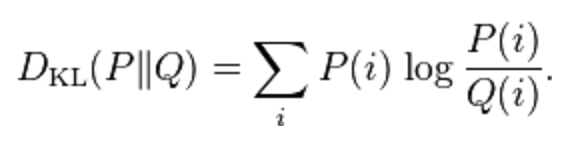

In [103]:
# CHECK 2 (QUANTITATIVE): D_KL(direct, gibbs), or D_KL(true, approx)
#  basically, the penalty (in number of bits) paid to approx the true distribution.
#  NB: direct is taken to be 'true' distribution, gibbs an approximation.
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/DATA/kl_divergence.png', 
      width="30%")

In [146]:
def kl_divergence(ps, qs): # assuming p, q are float.
    return sum(p*math.log(p/q,2) for p,q in zip(ps,qs))
totalTries = sum(val[0] for val in distrCompResults.itervalues()) # 1000 in our example.
ps = [float(val[1])/totalTries for val in distrCompResults.itervalues()] # p(direct)
qs = [float(val[0])/totalTries for val in distrCompResults.itervalues()] # p(gibbs)
ourKLD = kl_divergence(ps, qs)
print ourKLD

0.0436259425535


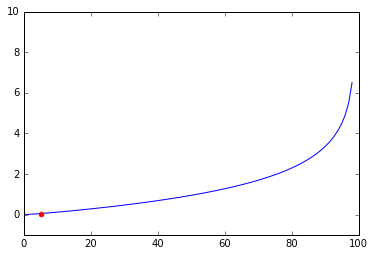

In [170]:
# KL-DIVERGENCE DEMO (HOW GOOD IS ourKLD IN SHOWING THE SIMILARITY BETWEEN DIRECT & GIBBS?)
#  true = [.01,.99]; approx = [.01,.99] ... [.99,.01] at .01 steps.
d1 = np.arange(0.01,1,.01)
d2 = [(1-d1i) for d1i in d1]
klds = [kl_divergence([.01,.99],distr) for distr in zip(d1,d2)]
plt.plot(klds)
plt.axis([0,100,-1,10])
closestIdx = min([(i,abs(ourKLD-kld)) for i,kld in enumerate(klds)], key=lambda x:x[1])[0]
    # find the index of the item in klds that is the closest to ourKLD.
plt.plot(closestIdx, ourKLD, 'r.', markersize=10) 
    # we can see its very low comparatively, indicating the high similarity between direct and gibbs.

## TOPIC MODELING
#### ASSUMPTIONS:
* There is some fixed number K of topics.
* There's a random variable that assigns each topic an associated probability distribution over words.
    * i.e. $ p(w|t) $
* There's a random variable that assigns each document a probability distribution over topics.
    * i.e. $ p(t|d) $
* Each word in a document was generated by $ p(w|d) = p(w|t)\cdot p(t|d) $.

In [178]:
from collections import Counter

In [179]:
# ARCHITECTURE OF DATA
#  A collection defining p(t|d):
#  documents[3][4]: the 5th word in the 4th document.
#  document_topic[3][4]: the topic for that word.

### ALGORITHM
* 1, Go through each document one word at a time, assign, at random, a topic to each word. { randomly assign topic k -> (w,d) }.
* 2, For every particular word in a document, construct weights for each topic, based on the current distribution of topics in that document and the current distribution of words for that topic. { assign weight to topic k by p(w|t_k)*p(t_k|d) }.
* 3, Use the weights to sample a new topic for each word, holding the rest of the words constant. { give (w,d) a new topic by topic weights distribution obtain at step 2 }.
* 4, Iterate until no topic changes for all words.

In [176]:
# SAMPLE GIVEN DISTRIBUTION/WEIGHTS
def sample_from(weights): # topic weights.
    # returns i with probability weights[i]/sum(weights).
    total = sum(weights)
    rnd = total * random.random()
    # return the smallest i s.t. weights[0] + ... + weights[i] >= rnd.
    #  e.g. for weights = [1, 1, 3], p(idx=0) = 1/5; p(idx=1) = 1/5; p(idx=2) = 3/5.
    for i,w in enumerate(weights):
        rnd -= w
        if rnd <= 0: return i

In [181]:
# TOY DATA
#  k intuition: 4.
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]
K = 4

In [182]:
# DS FOR SAMPLING WEIGHTS
#  NB: n represents '# of tokens/words'.
documentTopicCounts = [Counter() for _ in documents] # topic distribution in documents, for p(t,d).
    # RECORD: how many times each topic is assigned to each document.
    # a list of Counters, 1 for each document.
    # [[doc1 t1:n1, t2:n2, ...], ...]
    # e.g. the number of words in doc3 associated with topic1 = documentTopicCounts[3][1].
topicWordCounts = [Counter() for _ in range(K)] # word distribution in topics, for p(w,t).
    # RECORD: how many times each word is assigned to each topic.
    # a list of Counters, 1 for each topic.
    # [[topic1 w1:n1, w2:n2, ...], ...]
    # e.g. the number of occurrence of 'nlp' in topic2 = topicWordCounts[2]['nlp'].
topicCounts = [0 for _ in range(K)] # fraction of topics by token, for p(t).
    # RECORD: total number of words assigned to each topic.
    # a list of numbers, 1 for each topic.
    # [[topic1 n1], ...]
documentLengths = map(len, documents) # fraction of document by token, for p(d).
    # RECORD: total number of words in each document.
    # a list of numbers, 1 for each document.
    # [[doc1 n1], ...]
distinctWords = set(word for document in documents for word in document)
W = len(distinctWords)
    # vocabulary.
D = len(documents)
    # number of documents.

In [183]:
# CONDITIONAL DISTRIBUTION FUNCTIONS
#  alpha, beta: smoothing hyperparameters.
def p_topic_given_document(topic, d, alpha=.1): # p(t|d) = p(t,d) / p(d).
    # returns the fraction of words in document d that are assigned to topic.
    return ((documentTopicCounts[d][topic] + alpha) / (documentLengths[d] + K*alpha))
def p_word_given_topic(word, topic, beta=.1): # p(w|t) = p(w,t) / p(t).
    # returns the fraction of words assigned to topic.
    return ((topicWordCounts[topic][word] + beta) / (topicCounts[topic] + W*beta))

In [185]:
# WEIGHTS FUNCTIONS
#  NB: the likelihood of any topic choice depends on:
#   1. how likely that topic is for the document,
#   2. how likely that word is for the topic.
def topic_weight(d, word, k): # wt_{t_k}{d_i,w_i} = p(w_i|t_k)*p(t_k|d_i).
    # given a document and a word in that document,
    # returns the weight for the kth topic.
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)
def choose_new_topic(d, word): # sample topic for (w_j,d_i) given [wt_{t1}, wt_{t2}, ...].
    # given a topic weights distribution,
    # return a topic for a word in a document.
    return sample_from([topic_weight(d, word, k) for k in range(K)])

In [187]:
# STEP 1: RANDOMLY ASSIGN A TOPIC TO EACH WORD
#  and populate documentTopicCounts, topicWordCounts, topicCounts.
random.seed(1)
documentTopics = [[random.randrange(K) for word in document] for document in documents]
    # randomly assign topics to each word in each document.
for d in range(D): # for each document.
    for word,topic in zip(documents[d], documentTopics[d]): # for each word, topic.
        documentTopicCounts[d][topic] += 1 # p(t,d)+=1.
        topicWordCounts[topic][word] += 1 # p(w,t)+=1.
        topicCounts[topic] += 1 # p(t)+=1.
    # populating: p(t,d), p(w,t), and p(t). p(d) is known.

In [ ]:
# STEP 2: SAMPLE JOINT SAMPLE OF T-W AND D-T DISTRIBUTION
for iter in range(1000):
    for d in range(D):
        for i,(word,topic) in enumerate(zip(documents[d], documentTopics[d])):
            # remove this word/topic from the counts, so that it doesn't influence the weights.
            documentTopicCounts[d][topic] -= 1
            topicWordCounts[topic][word] -= 1
            topicCounts[topic] -= 1
            documentLengths[d] -= 1
            # choose a new topic based on the weights.
            newTopic = choose_new_topic(d, word)
            documentTopics[d][i] = newTopic
            # add it back to the counts.
            documentTopicCounts[d][newTopic] += 1
            topicWordCounts[newTopic][word] += 1
            topicCounts[newTopic] += 1
            documentLengths[d] += 1

In [190]:
# STEP 3: GENERATE TOPICS
#  each topic is defined by its top 5 heaviest words.
#  k: topic label, i.e. 0, 1, 2, 3 (for k=4).
for k, wordCounts in enumerate(topicWordCounts): # enumerate over p(w,t).
    for word, count in wordCounts.most_common(5): # from {topic w1:n1, w2,n2, ... }.
        if count > 0: 
            print k, word, count

0 Python 2
0 statistics 1
0 programming languages 1
0 MongoDB 1
0 scikit-learn 1
1 Java 2
1 R 2
1 Big Data 1
1 decision trees 1
1 Postgres 1
2 artificial intelligence 2
2 statistics 1
2 Postgres 1
2 probability 1
2 MongoDB 1
3 Big Data 2
3 Python 2
3 neural networks 2
3 HBase 2
3 Java 1


In [191]:
# WHAT ARE THE TOPIC DISTRIBUTION FOR EACH DOCUMENT?
topicNames = ['BIG DATA', 'STATISTICS', 'DATABASE', 'MACHINE LEARNING']
for document, documentTopicCount in zip(documents, documentTopicCounts):
    print document
    for topic, count in documentTopicCount.most_common(2): # from {document t1:n1, t2:n2, ...}.
        if count > 0:
            print topicNames[topic], count,
    print 

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
STATISTICS 3 MACHINE LEARNING 2
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
BIG DATA 2 MACHINE LEARNING 2
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
BIG DATA 2 MACHINE LEARNING 2
['R', 'Python', 'statistics', 'regression', 'probability']
BIG DATA 2 MACHINE LEARNING 2
['machine learning', 'regression', 'decision trees', 'libsvm']
BIG DATA 2 STATISTICS 2
['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
BIG DATA 4 STATISTICS 2
['statistics', 'probability', 'mathematics', 'theory']
STATISTICS 2 BIG DATA 1
['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
DATABASE 2 BIG DATA 1
['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
BIG DATA 1 STATISTICS 1
['Hadoop', 'Java', 'MapReduce', 'Big Data']
MACHINE LEARNING 2 STATISTICS 1
['statistics', 'R', 'statsmodels']
DATABASE 2 STATISTICS 1
['C++', 'deep learning', 'artificial intell